In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the ECG datasets (ST and AFib) as CSV files into Pandas DataFrames.
st_ecg_data = pd.read_csv('NSR.csv')
afib_ecg_data = pd.read_csv('AF.csv')

# Select all columns with the name 'Lead2' from each dataset.
st_lead2 = st_ecg_data.filter(like='Lead2')
afib_lead2 = afib_ecg_data.filter(like='Lead2')

# Transpose the DataFrames to have each row represent one ECG data point.
st_lead2 = st_lead2.T
afib_lead2 = afib_lead2.T

# Label the data as before.
st_lead2['8003'] = '0'
afib_lead2['8003'] = '1'

# Combine the datasets into a single DataFrame.
ecg_data = pd.concat([st_lead2, afib_lead2])

# Split the data into training and test DataFrames.
train_df, temp_df = train_test_split(ecg_data, test_size=0.4, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [2]:
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [3]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,7994,7995,7996,7997,7998,7999,8000,8001,8002,8003
0,0.195945,0.614280,-1.289731,-10.657879,-27.617260,-42.741580,-47.198548,-43.933919,-42.497546,-46.120974,...,-1.593890e-278,4.001308e-279,1.162656e-278,3.345685e-279,-5.374081e-279,-4.689240e-279,9.253550e-280,3.295649e-279,1.074705e-279,0
1,0.804404,6.472699,23.694557,52.471898,79.227330,88.480901,80.861176,71.438469,71.261333,77.508545,...,-9.212461e-279,2.282145e-279,6.704837e-279,1.944728e-279,-3.091537e-279,-2.709706e-279,5.263079e-280,1.900238e-279,6.240454e-280,0
2,0.216570,2.041326,8.597470,21.810359,38.017916,49.468572,51.261769,44.872981,35.149057,25.964517,...,2.596098e-278,-9.517695e-280,-1.617690e-278,-7.447237e-279,6.092588e-279,7.526785e-279,4.728227e-281,-4.529813e-279,-2.275182e-279,0
3,0.928159,13.704615,72.145927,205.250211,370.619026,465.652764,444.773203,375.259005,346.859200,372.273159,...,1.241687e-278,-2.731592e-278,-2.105892e-278,6.080268e-279,1.575494e-278,4.135525e-279,-7.479785e-279,-6.211380e-279,1.444271e-279,0
4,-0.752840,-3.657924,-4.887841,6.928777,34.523001,59.657133,63.162153,49.582901,38.630921,39.839583,...,-4.977809e-278,-3.529124e-278,1.260999e-278,2.760310e-278,6.061572e-279,-1.369199e-278,-1.045750e-278,3.096414e-279,7.861849e-279,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.340325,1.765470,3.158156,0.613578,-6.593011,-12.414441,-12.025418,-8.543237,-7.596718,-10.169540,...,-1.043712e-278,4.436268e-279,8.514031e-279,1.538887e-279,-4.387271e-279,-3.106821e-279,1.113200e-279,2.431541e-279,5.325118e-280,0
427,-0.319699,-2.710385,-10.391855,-23.931743,-37.206346,-42.103225,-37.965560,-32.171989,-31.004182,-33.635314,...,-2.078673e-278,1.154039e-279,1.314710e-278,5.822233e-279,-5.065663e-279,-6.034446e-279,7.162047e-281,3.686006e-279,1.784763e-279,0
428,-0.082503,-0.572373,-1.788986,-3.382299,-4.438630,-4.494746,-3.940839,-3.428736,-3.286589,-3.444547,...,-2.834840e-279,-7.635889e-280,1.336207e-279,1.124624e-279,-2.505648e-280,-8.045999e-280,-2.474676e-280,3.640030e-280,3.302322e-280,0
429,0.567208,4.974086,19.594612,46.036865,72.451005,82.222003,73.461041,60.944390,57.614072,62.046698,...,2.708101e-278,-8.617079e-279,-2.065609e-278,-5.031648e-279,1.000026e-278,8.003520e-279,-2.080189e-279,-5.873337e-279,-1.654514e-279,0


In [4]:
train_x = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]
X_val=validation_df.iloc[:,:-1]
y_val=validation_df.iloc[:,-1]
X_test=test_df.iloc[:, :-1]
y_test=test_df.iloc[:, -1]


In [5]:
train_x


,0,1,2,3,4,5,6,7,8,9,...,7993,7994,7995,7996,7997,7998,7999,8000,8001,8002
0,0.195945,0.614280,-1.289731,-10.657879,-27.617260,-42.741580,-47.198548,-43.933919,-42.497546,-46.120974,...,-1.968170e-278,-1.593890e-278,4.001308e-279,1.162656e-278,3.345685e-279,-5.374081e-279,-4.689240e-279,9.253550e-280,3.295649e-279,1.074705e-279
1,0.804404,6.472699,23.694557,52.471898,79.227330,88.480901,80.861176,71.438469,71.261333,77.508545,...,-1.132524e-278,-9.212461e-279,2.282145e-279,6.704837e-279,1.944728e-279,-3.091537e-279,-2.709706e-279,5.263079e-280,1.900238e-279,6.240454e-280
2,0.216570,2.041326,8.597470,21.810359,38.017916,49.468572,51.261769,44.872981,35.149057,25.964517,...,2.285714e-278,2.596098e-278,-9.517695e-280,-1.617690e-278,-7.447237e-279,6.092588e-279,7.526785e-279,4.728227e-281,-4.529813e-279,-2.275182e-279
3,0.928159,13.704615,72.145927,205.250211,370.619026,465.652764,444.773203,375.259005,346.859200,372.273159,...,5.533450e-278,1.241687e-278,-2.731592e-278,-2.105892e-278,6.080268e-279,1.575494e-278,4.135525e-279,-7.479785e-279,-6.211380e-279,1.444271e-279
4,-0.752840,-3.657924,-4.887841,6.928777,34.523001,59.657133,63.162153,49.582901,38.630921,39.839583,...,1.752830e-278,-4.977809e-278,-3.529124e-278,1.260999e-278,2.760310e-278,6.061572e-279,-1.369199e-278,-1.045750e-278,3.096414e-279,7.861849e-279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.340325,1.765470,3.158156,0.613578,-6.593011,-12.414441,-12.025418,-8.543237,-7.596718,-10.169540,...,-1.589014e-278,-1.043712e-278,4.436268e-279,8.514031e-279,1.538887e-279,-4.387271e-279,-3.106821e-279,1.113200e-279,2.431541e-279,5.325118e-280
427,-0.319699,-2.710385,-10.391855,-23.931743,-37.206346,-42.103225,-37.965560,-32.171989,-31.004182,-33.635314,...,-1.894945e-278,-2.078673e-278,1.154039e-279,1.314710e-278,5.822233e-279,-5.065663e-279,-6.034446e-279,7.162047e-281,3.686006e-279,1.784763e-279
428,-0.082503,-0.572373,-1.788986,-3.382299,-4.438630,-4.494746,-3.940839,-3.428736,-3.286589,-3.444547,...,-1.061858e-279,-2.834840e-279,-7.635889e-280,1.336207e-279,1.124624e-279,-2.505648e-280,-8.045999e-280,-2.474676e-280,3.640030e-280,3.302322e-280
429,0.567208,4.974086,19.594612,46.036865,72.451005,82.222003,73.461041,60.944390,57.614072,62.046698,...,3.644654e-278,2.708101e-278,-8.617079e-279,-2.065609e-278,-5.031648e-279,1.000026e-278,8.003520e-279,-2.080189e-279,-5.873337e-279,-1.654514e-279


In [6]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy={'0': 392, '1': 392})
x_train_smote, train_y = smote.fit_resample(train_x, train_y)
percentSmote = train_y.value_counts()
print(percentSmote)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={'0': 133, '1': 133})
x_val_smote, val_y= smote.fit_resample(X_val, y_val)
percentSmot = val_y.value_counts()
print(percentSmot)
smote = SMOTE(sampling_strategy={'0': 135, '1': 135})
x_test_smote, test_y = smote.fit_resample(X_test, y_test)
percentSmo = test_y.value_counts()
print(percentSmo)


0    392
1    392
Name: 8003, dtype: int64
0    133
1    133
Name: 8003, dtype: int64
0    135
1    135
Name: 8003, dtype: int64


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


# Convert DataFrames to NumPy arrays before reshaping
train_X = np.array(x_train_smote).reshape((x_train_smote.shape[0], x_train_smote.shape[1], 1))
val_X = np.array(x_val_smote).reshape((x_val_smote.shape[0], x_val_smote.shape[1], 1))
test_X = np.array(x_test_smote).reshape((x_test_smote.shape[0], x_test_smote.shape[1], 1))


# Standardize the data
scaler = StandardScaler()
train_X = scaler.fit_transform(x_train_smote)
val_X = scaler.transform(x_val_smote)
test_X = scaler.transform(x_test_smote)

# Convert DataFrames to NumPy arrays before reshaping
train_X = np.array(x_train_smote).reshape((x_train_smote.shape[0], x_train_smote.shape[1], 1))
val_X = np.array(x_val_smote).reshape((x_val_smote.shape[0], x_val_smote.shape[1], 1))
test_X = np.array(x_test_smote).reshape((x_test_smote.shape[0], x_test_smote.shape[1], 1))


train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)



In [8]:
print("train_X shape:",train_X.shape)
print("train_y shape:", train_y.shape)
print("X_val shape:", val_X.shape)
print("val_y shape:", val_y.shape)

train_X shape: (784, 8003, 1)
train_y shape: (784, 2)
X_val shape: (266, 8003, 1)
val_y shape: (266, 2)


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Assuming your data is 1D

# Assuming you have loaded train_X, train_y, val_X, val_y, test_X, test_y
class_weights = {0: 1.0, 1: 5.0} 
model = Sequential()

# Assuming your data is 1D
im_shape = (train_X.shape[1], 1)

# Block 1
model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=im_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=6, strides=6, padding="same"))
model.add(Dropout(0.2))

# Block 2
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 3
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 4
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 5
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 6
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 7
model.add(Conv1D(512, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 8
# Block 8
model.add(Conv1D(512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 9
# Block 9
model.add(Conv1D(1024, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 10
model.add(Conv1D(1024, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have an EarlyStopping callback defined
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
# Assuming you have a ModelCheckpoint callback defined
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

callbacks = [early_stopping, model_checkpoint]

# Assuming your data has the same format as the example
# Assuming your data has the same format as the example
history = model.fit(
    train_X,
    train_y,  # Assuming train_y is a 1D array with values 0 or 1
    epochs=20,
    callbacks=callbacks,
    batch_size=64,
    validation_data=(val_X, val_y),  # Assuming val_y is a 1D array with values 0 or 1
    class_weight=class_weights  # Pass the class weights here
)
# Evaluate the model on the test set
accuracy = model.evaluate(test_X, test_y)[1]
print(f'Test Accuracy: {accuracy}')

Epoch 1/20
13/13 [==============================] - 75s 5s/step - loss: 1.3188 - accuracy: 0.5102 - val_loss: 0.7611 - val_accuracy: 0.5000
Epoch 2/20
13/13 [==============================] - 36s 3s/step - loss: 1.1208 - accuracy: 0.5969 - val_loss: 0.7229 - val_accuracy: 0.5338
Epoch 3/20
13/13 [==============================] - 34s 3s/step - loss: 1.0501 - accuracy: 0.6224 - val_loss: 0.6641 - val_accuracy: 0.5789
Epoch 4/20
13/13 [==============================] - 33s 3s/step - loss: 0.9654 - accuracy: 0.6901 - val_loss: 0.6752 - val_accuracy: 0.5075
Epoch 5/20
13/13 [==============================] - 35s 3s/step - loss: 0.8904 - accuracy: 0.6594 - val_loss: 0.6484 - val_accuracy: 0.6278
Epoch 6/20
13/13 [==============================] - 60s 5s/step - loss: 0.8472 - accuracy: 0.7985 - val_loss: 0.6142 - val_accuracy: 0.6992
Epoch 7/20
13/13 [==============================] - 61s 5s/step - loss: 0.7313 - accuracy: 0.8099 - val_loss: 0.6800 - val_accuracy: 0.6015
Epoch 8/20
13/13 [==

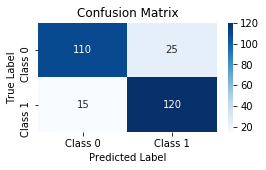

True Positives (TP): 120
True Negatives (TN): 110
False Positives (FP): 25
False Negatives (FN): 15
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       135
           1       0.83      0.89      0.86       135

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270

Accuracy: 0.8518518518518519


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you have predictions for the test set
y_pred = model.predict(test_X)

# Convert predicted probabilities to class labels using a threshold (e.g., 0.5 for binary classification)
threshold = 0.2
y_pred_classes = (y_pred[:, 1] > threshold).astype(int)

# Convert true labels to class labels
y_true = test_y.argmax(axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# You can also calculate and print precision, recall, and F1-score separately if needed



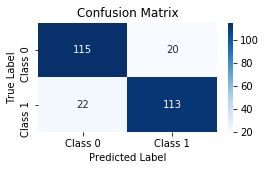

True Positives (TP): 113
True Negatives (TN): 115
False Positives (FP): 20
False Negatives (FN): 22
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       135
           1       0.85      0.84      0.84       135

    accuracy                           0.84       270
   macro avg       0.84      0.84      0.84       270
weighted avg       0.84      0.84      0.84       270

Accuracy: 0.8444444444444444


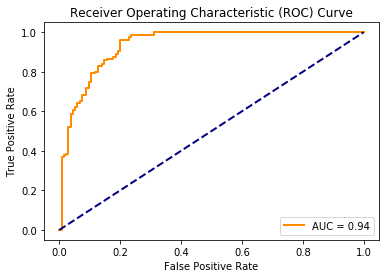

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Assuming you have predictions for the test set
y_pred = model.predict(test_X)

# Convert predicted probabilities to class labels using a threshold (e.g., 0.5 for binary classification)
threshold = 0.5
y_pred_classes = (y_pred[:, 1] > threshold).astype(int)

# Convert true labels to class labels
y_true = test_y.argmax(axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


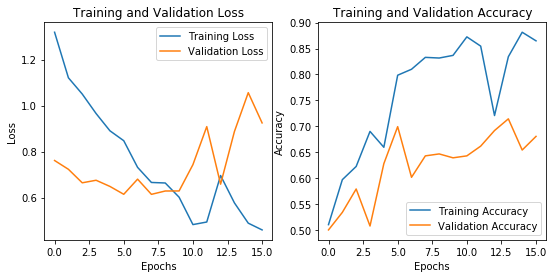

In [12]:
import matplotlib.pyplot as plt

# Assuming you have trained the model and have the 'history' object
# history = model.fit(...)

# Plot training and validation loss
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from pyswarm import pso

# Assuming your data is 1D
im_shape = (train_X.shape[1], 1)

# Assuming you have loaded train_X, train_y, val_X, val_y
class_weights = {0: 5.0, 1: 10.0} 
model = Sequential()


# Block 1
model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=im_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=6, strides=6, padding="same"))
model.add(Dropout(0.2))

    # Block 2
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Block 3
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Block 4
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Block 5
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Block 6
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Block 7
model.add(Conv1D(512, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Block 8
model.add(Conv1D(512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Block 9
model.add(Conv1D(1024, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Block 10
model.add(Conv1D(1024, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

    # Flatten layer
model.add(Flatten())

    # Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# ... (rest of your model architecture)

# Output layer
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have an EarlyStopping callback defined
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
# Assuming you have a ModelCheckpoint callback defined
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

callbacks = [early_stopping, model_checkpoint]

# Assuming your data has the same format as the example
history = model.fit(
    train_X,
    train_y,
    epochs=40,
    callbacks=callbacks,
    batch_size=64,
    validation_data=(val_X, val_y),
    class_weight=class_weights
)

# Evaluate the model on the test set
accuracy = model.evaluate(test_X, test_y)[1]
print(f'Test Accuracy: {accuracy}')

# Function to flatten and reshape the model weights
def flatten_weights(model):
    weights = []
    for layer in model.layers:
        layer_weights = layer.get_weights()
        if layer_weights:
            weights.extend(np.ravel(layer_weights[0]))
            weights.extend(np.ravel(layer_weights[1]))
    return np.array(weights)
def reshape_params(model, params):
    current_index = 0
    for layer in model.layers:
        layer_weights = layer.get_weights()
        if layer_weights:
            print(f"Layer: {layer.name}, Original Shape: {layer_weights[0].shape}")
            if isinstance(layer, BatchNormalization):
                gamma = params[current_index]
                beta = params[current_index + 1]
                moving_mean = params[current_index + 2]
                moving_variance = params[current_index + 3]
                layer.set_weights([gamma, beta, moving_mean, moving_variance])
                current_index += 4
            else:
                flat_weights = np.ravel(layer_weights[0])
                kernel_shape = layer_weights[0].shape
                bias_shape = layer_weights[1].shape
                print(f"Kernel Shape: {kernel_shape}, Bias Shape: {bias_shape}")
                layer.set_weights([
                    flat_weights[current_index:current_index + np.prod(kernel_shape)].reshape(kernel_shape),
                    flat_weights[current_index + np.prod(kernel_shape):current_index + np.prod(kernel_shape) + np.prod(bias_shape)].reshape(bias_shape)
                ])
                current_index += np.prod(kernel_shape) + np.prod(bias_shape)


# PSO objective function
def pso_objective_function(params, model, train_X, train_y, val_X, val_y, class_weights):
    reshape_params(model, params)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        train_X,
        train_y,
        epochs=40,
        batch_size=64,
        validation_data=(val_X, val_y),
        class_weight=class_weights,
        verbose=0  # Set verbose to 0 to avoid printing during optimization
    )
    
    val_loss = history.history['val_loss'][-1]  # Use the last validation loss as the objective
    return val_loss

# PSO optimization
lb = -1.0 * np.ones_like(flatten_weights(model))
ub = 1.0 * np.ones_like(flatten_weights(model))
swarmsize = 10
best_weights, _ = pso(pso_objective_function, lb, ub, args=(model, train_X, train_y, val_X, val_y, class_weights), swarmsize=swarmsize)
reshape_params(model, best_weights)

# Evaluate the optimized model on the test set
accuracy = model.evaluate(test_X, test_y)[1]
print(f'Test Accuracy (Optimized): {accuracy}')


Epoch 1/40
13/13 [==============================] - 70s 4s/step - loss: 4.6770 - accuracy: 0.6008 - val_loss: 0.7256 - val_accuracy: 0.5000
Epoch 2/40
13/13 [==============================] - 49s 4s/step - loss: 4.1796 - accuracy: 0.6327 - val_loss: 0.7084 - val_accuracy: 0.5038
Epoch 3/40
13/13 [==============================] - 49s 4s/step - loss: 3.5501 - accuracy: 0.7372 - val_loss: 0.7345 - val_accuracy: 0.6053
Epoch 4/40
13/13 [==============================] - 40s 3s/step - loss: 3.3705 - accuracy: 0.7360 - val_loss: 0.6717 - val_accuracy: 0.5752
Epoch 5/40
13/13 [==============================] - 45s 3s/step - loss: 3.0979 - accuracy: 0.7870 - val_loss: 0.6838 - val_accuracy: 0.5564
Epoch 6/40
13/13 [==============================] - 51s 4s/step - loss: 3.2312 - accuracy: 0.7628 - val_loss: 0.6733 - val_accuracy: 0.5940
Epoch 7/40
13/13 [==============================] - 51s 4s/step - loss: 2.6792 - accuracy: 0.8214 - val_loss: 0.6818 - val_accuracy: 0.5752
Epoch 8/40
13/13 [==

ValueError: cannot reshape array of size 0 into shape (64,)

9/9 [==============================] - 1s 127ms/step


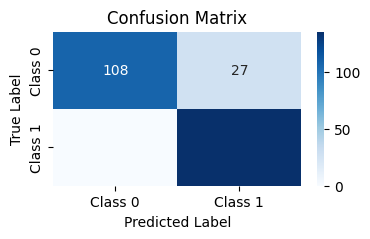

True Positives (TP): 135
True Negatives (TN): 108
False Positives (FP): 27
False Negatives (FN): 0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       135
           1       0.83      1.00      0.91       135

    accuracy                           0.90       270
   macro avg       0.92      0.90      0.90       270
weighted avg       0.92      0.90      0.90       270

Accuracy: 0.9


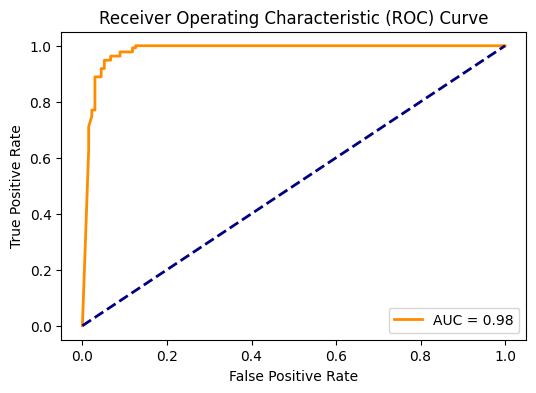

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Assuming you have predictions for the test set
y_pred = model.predict(test_X)

# Convert predicted probabilities to class labels using a threshold (e.g., 0.5 for binary classification)
threshold = 0.92
y_pred_classes = (y_pred[:, 1] > threshold).astype(int)

# Convert true labels to class labels
y_true = test_y.argmax(axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


9/9 [==============================] - 1s 132ms/step


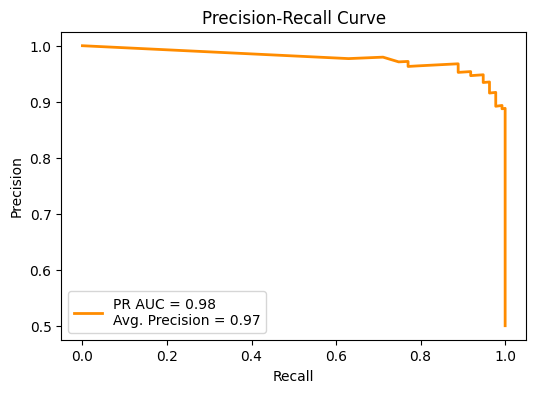

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Assuming you have predictions for the test set
y_pred_probs = model.predict(test_X)[:, 1]

# Convert true labels to class labels
y_true = test_y.argmax(axis=1)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)

# Calculate Area Under the Curve (AUC) for Precision-Recall Curve
pr_auc = auc(recall, precision)

# Calculate Average Precision
average_precision = average_precision_score(y_true, y_pred_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR AUC = {pr_auc:.2f}\nAvg. Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


9/9 [==============================] - 1s 131ms/step


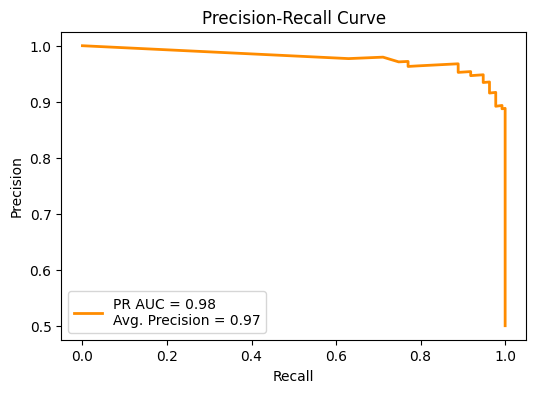

AUC-PR: 0.9778
Average Precision: 0.9706
9/9 [==============================] - 1s 150ms/step


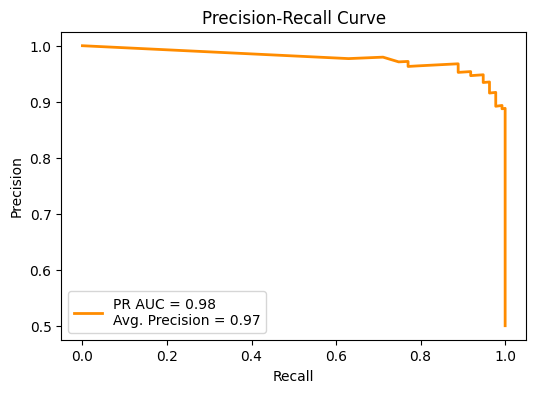

AUC-PR: 0.9778
Average Precision: 0.9706


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Assuming you have predictions for the test set
y_pred_probs = model.predict(test_X)[:, 1]

# Convert true labels to class labels
y_true = test_y.argmax(axis=1)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)

# Calculate Area Under the Precision-Recall Curve (AUC-PR)
pr_auc = auc(recall, precision)

# Calculate Average Precision
average_precision = average_precision_score(y_true, y_pred_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR AUC = {pr_auc:.2f}\nAvg. Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Display AUC-PR and Average Precision
print(f'AUC-PR: {pr_auc:.4f}')
print(f'Average Precision: {average_precision:.4f}')
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Assuming you have predictions for the test set
y_pred_probs = model.predict(test_X)[:, 1]

# Convert true labels to class labels
y_true = test_y.argmax(axis=1)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)

# Calculate Area Under the Precision-Recall Curve (AUC-PR)
pr_auc = auc(recall, precision)

# Calculate Average Precision
average_precision = average_precision_score(y_true, y_pred_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR AUC = {pr_auc:.2f}\nAvg. Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Display AUC-PR and Average Precision
print(f'AUC-PR: {pr_auc:.4f}')
print(f'Average Precision: {average_precision:.4f}')
